In [19]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
plt.style.use('ggplot')

In [20]:
df = pd.read_csv("./data/housing_data.csv")

In [21]:
df.shape

(506, 14)

In [22]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [23]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

There are 14 attributes in each case of the dataset. They are:

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

In [24]:
df = df[['RM', 'MEDV']] # Firstly I'll implement focus on single variable linear regression

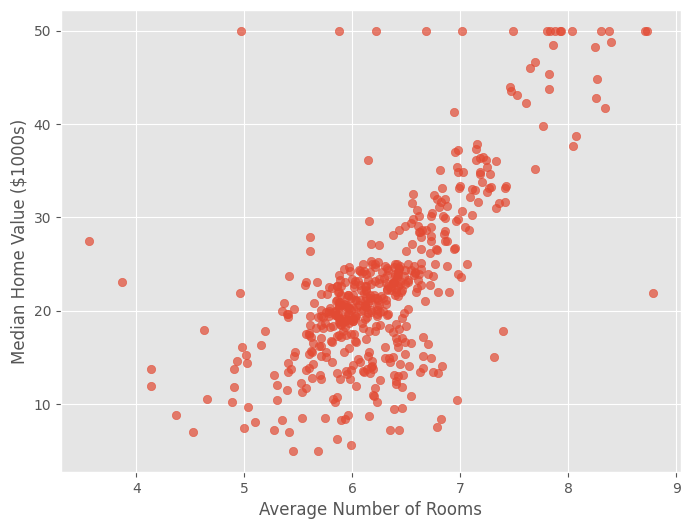

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(df['RM'], df['MEDV'], alpha=0.7)
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median Home Value ($1000s)')
plt.show()

The relationship is pretty linear, there are some concerns with the spread of the data towards the bottom of the graph, but it should be possible to model this linearly.

In [87]:
line = np.array([1.0, 1.0]) # Set our y=mx+c to a variable to start the process

In [88]:
feature = df['RM'].values
target = df['MEDV'].values

In [89]:
def dJ_dm(n, x, y, m, b):
    return (-2/n) * (x @ (y - (m*x+b)))

In [90]:
def dJ_db(n, x, y, m, b):
    return (-2/n) * np.sum(y - (m*x+b))

In [94]:
learning_rate = 0.001

In [101]:
for _ in range(1000):
    amount_of_rows = len(feature)
    slope = line[0]
    intercept = line[1]
    
    line[0] = slope - (learning_rate * dJ_dm(amount_of_rows, feature, target, slope, intercept))
    line[1] = intercept - (learning_rate * dJ_db(amount_of_rows, feature, target, slope, intercept))
    
print(line)
    

[  9.10210898 -34.67062078]


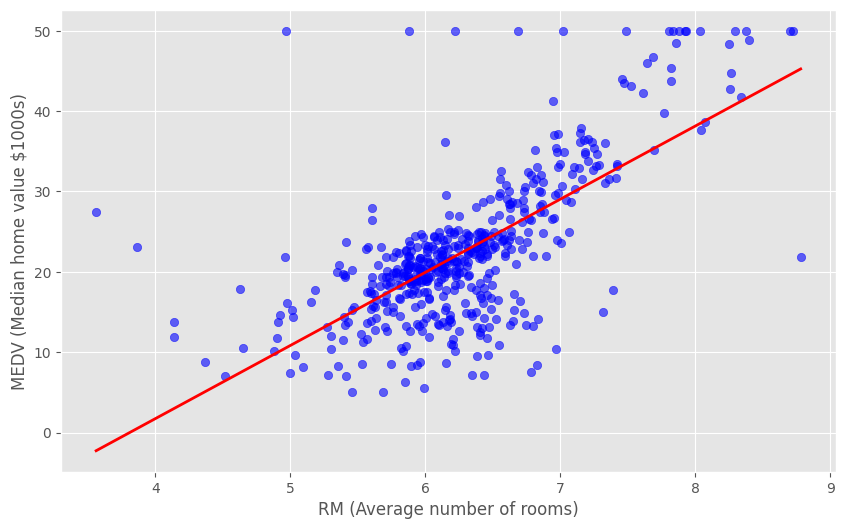

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(feature, target, alpha=0.6, color='blue')
x_line = np.linspace(feature.min(), feature.max(), 100)
y_line = line[0] * x_line + line[1]  # y = mx + b
plt.plot(x_line, y_line, color='red', linewidth=2)
plt.xlabel('RM (Average number of rooms)')
plt.ylabel('MEDV (Median home value $1000s)')
plt.show()